Create the SQLite Database and Table

In [5]:
import sqlite3
import pandas as pd

# Read the CSV data
sales_data = pd.read_csv('sales_data.csv')

# Convert amount from string to float
sales_data['amount'] = sales_data['amount'].astype(float)

# Create SQLite database and connection
conn = sqlite3.connect('sales_data.db')

# Create a cursor object
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    order_id INTEGER PRIMARY KEY,
    order_date TEXT,
    amount REAL,
    product_id INTEGER
)
''')

# Insert data from CSV
sales_data.to_sql('sales', conn, if_exists='replace', index=False)

# Commit changes and close connection
conn.commit()
conn.close()

Connect to Database and Run SQL Queries

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('sales_data.db')

# Query 1: Total revenue and number of orders per product
query1 = """
SELECT 
    product_id,
    COUNT(*) AS total_orders,
    SUM(amount) AS total_revenue
FROM 
    sales
GROUP BY 
    product_id
ORDER BY 
    total_revenue DESC
"""

# Query 2: Monthly revenue summary
query2 = """
SELECT 
    strftime('%Y-%m', order_date) AS month,
    SUM(amount) AS monthly_revenue,
    COUNT(*) AS total_orders
FROM 
    sales
GROUP BY 
    month
ORDER BY 
    month
"""

# Execute queries and load into DataFrames
df_products = pd.read_sql_query(query1, conn)
df_monthly = pd.read_sql_query(query2, conn)

# Close the connection
conn.close()

Display Results and Create Visualizations

Product Sales Summary:
----------------------
 product_id  total_orders  total_revenue
        104             4         492.00
        103             4         282.95
        108             2         268.99
        107             2         248.00
        102             5         239.38
        110             1         199.95
        101             6         164.72
        109             1         159.95
        106             1         149.95
        105             4         114.92


Monthly Sales Summary:
----------------------
  month  monthly_revenue  total_orders
2023-01           195.19             4
2023-02           363.48             4
2023-03           298.93             4
2023-04           248.44             4
2023-05           348.44             4
2023-06           357.45             4
2023-07           399.39             4
2023-08           109.49             2


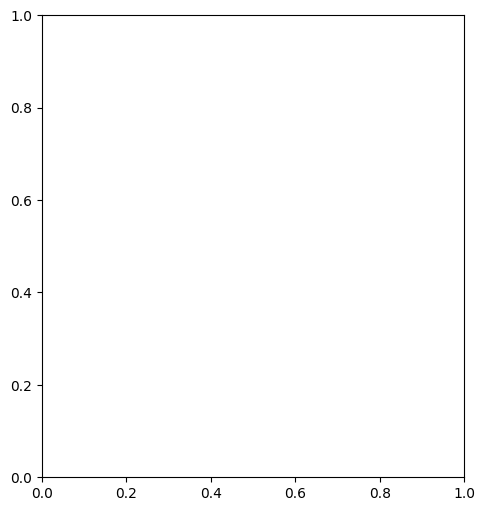

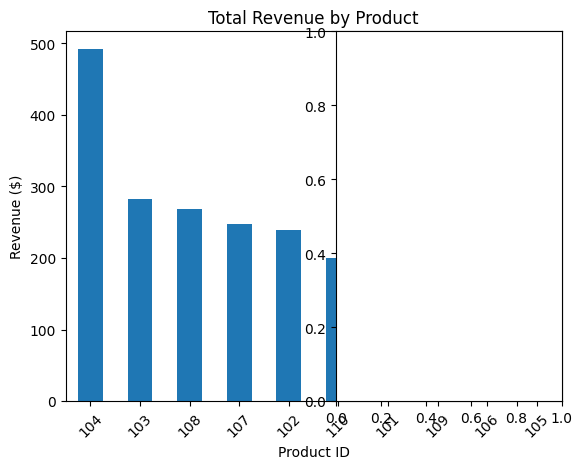

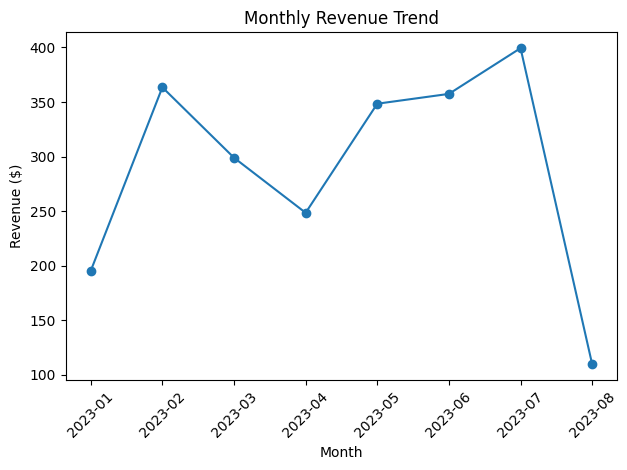

In [7]:
# Display product summary
print("Product Sales Summary:")
print("----------------------")
print(df_products.to_string(index=False))
print("\n")

# Display monthly summary
print("Monthly Sales Summary:")
print("----------------------")
print(df_monthly.to_string(index=False))

# Create visualizations
plt.figure(figsize=(12, 6))

# Product revenue bar chart
plt.subplot(1, 2, 1)
df_products.plot(kind='bar', x='product_id', y='total_revenue', legend=False)
plt.title('Total Revenue by Product')
plt.xlabel('Product ID')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

# Monthly revenue line chart
plt.subplot(1, 2, 2)
df_monthly.plot(kind='line', x='month', y='monthly_revenue', marker='o', legend=False)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.tight_layout()

# Save the chart
plt.savefig('sales_summary.png')

# Show the plots
plt.show()

Complete Python Script

Product Sales Summary:
----------------------
 product_id  total_orders  total_revenue
        104             4         492.00
        103             4         282.95
        108             2         268.99
        107             2         248.00
        102             5         239.38
        110             1         199.95
        101             6         164.72
        109             1         159.95
        106             1         149.95
        105             4         114.92


Monthly Sales Summary:
----------------------
  month  monthly_revenue  total_orders
2023-01           195.19             4
2023-02           363.48             4
2023-03           298.93             4
2023-04           248.44             4
2023-05           348.44             4
2023-06           357.45             4
2023-07           399.39             4
2023-08           109.49             2


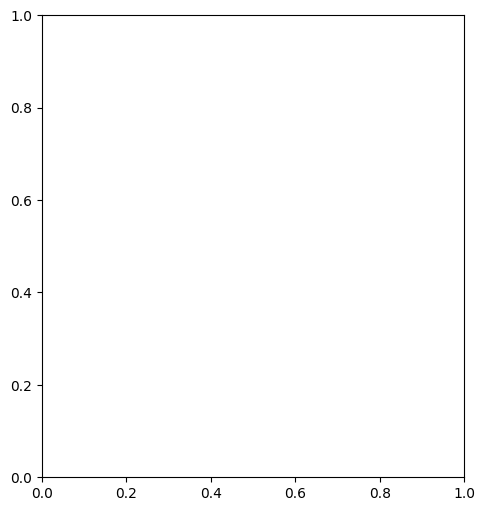

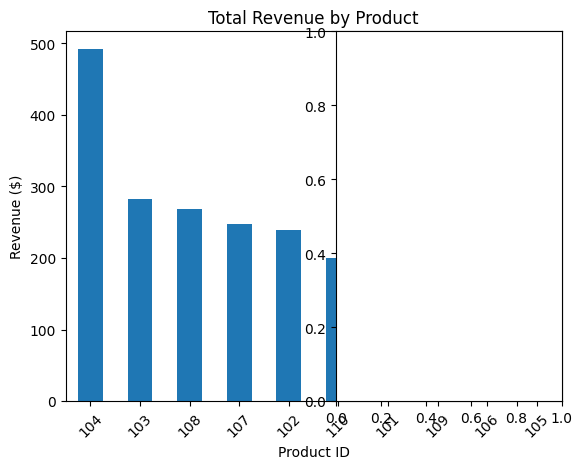

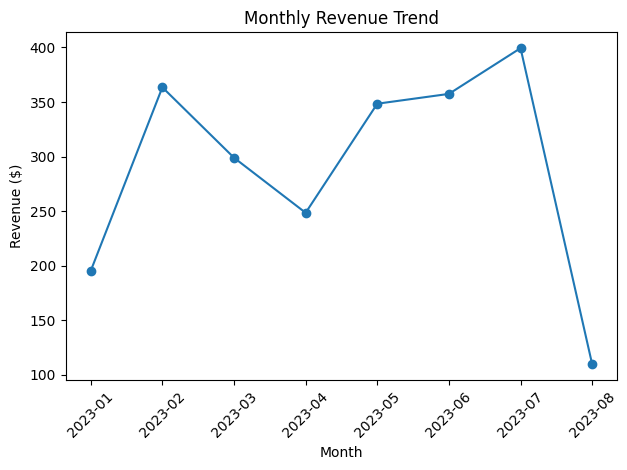

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def create_database():
    """Create SQLite database from CSV file"""
    # Read the CSV data
    sales_data = pd.read_csv('sales_data.csv')
    
    # Convert amount from string to float
    sales_data['amount'] = sales_data['amount'].astype(float)
    
    # Create SQLite database and connection
    conn = sqlite3.connect('sales_data.db')
    
    # Create a cursor object
    cursor = conn.cursor()
    
    # Create sales table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        order_id INTEGER PRIMARY KEY,
        order_date TEXT,
        amount REAL,
        product_id INTEGER
    )
    ''')
    
    # Insert data from CSV
    sales_data.to_sql('sales', conn, if_exists='replace', index=False)
    
    # Commit changes and close connection
    conn.commit()
    conn.close()
    print("Database created successfully.")

def analyze_sales():
    """Analyze sales data and generate reports"""
    # Connect to the database
    conn = sqlite3.connect('sales_data.db')
    
    # Query 1: Total revenue and number of orders per product
    query1 = """
    SELECT 
        product_id,
        COUNT(*) AS total_orders,
        SUM(amount) AS total_revenue
    FROM 
        sales
    GROUP BY 
        product_id
    ORDER BY 
        total_revenue DESC
    """
    
    # Query 2: Monthly revenue summary
    query2 = """
    SELECT 
        strftime('%Y-%m', order_date) AS month,
        SUM(amount) AS monthly_revenue,
        COUNT(*) AS total_orders
    FROM 
        sales
    GROUP BY 
        month
    ORDER BY 
        month
    """
    
    # Execute queries and load into DataFrames
    df_products = pd.read_sql_query(query1, conn)
    df_monthly = pd.read_sql_query(query2, conn)
    
    # Close the connection
    conn.close()
    
    # Display product summary
    print("Product Sales Summary:")
    print("----------------------")
    print(df_products.to_string(index=False))
    print("\n")
    
    # Display monthly summary
    print("Monthly Sales Summary:")
    print("----------------------")
    print(df_monthly.to_string(index=False))
    
    # Create visualizations
    plt.figure(figsize=(12, 6))
    
    # Product revenue bar chart
    plt.subplot(1, 2, 1)
    df_products.plot(kind='bar', x='product_id', y='total_revenue', legend=False)
    plt.title('Total Revenue by Product')
    plt.xlabel('Product ID')
    plt.ylabel('Revenue ($)')
    plt.xticks(rotation=45)
    
    # Monthly revenue line chart
    plt.subplot(1, 2, 2)
    df_monthly.plot(kind='line', x='month', y='monthly_revenue', marker='o', legend=False)
    plt.title('Monthly Revenue Trend')
    plt.xlabel('Month')
    plt.ylabel('Revenue ($)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    # Save the chart
    plt.savefig('sales_summary.png')
    
    # Show the plots
    plt.show()

if __name__ == "__main__":
    # Create the database (only needed once)
    # create_database()
    
    # Analyze the sales data
    analyze_sales()